In [63]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [65]:
sal= pd.read_csv ('Superstore_Sales_Assignment.csv');

In [67]:
sal.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment
0,ORD-1000,PROD-2000,Technology,Binders,683.23,8,0.1,34.29,East,Seattle,CUST-3000,2023-01-01,2023-01-03,Same Day,Consumer
1,ORD-1001,PROD-2001,Furniture,Storage,492.87,6,0.0,222.18,East,Chicago,CUST-3001,2023-01-02,2023-01-04,First Class,Home Office
2,ORD-1002,PROD-2002,Technology,Chairs,503.17,7,0.0,255.76,East,San Francisco,CUST-3002,2023-01-03,2023-01-05,Same Day,Home Office
3,ORD-1003,PROD-2003,Technology,Tables,101.62,3,0.2,248.05,West,Houston,CUST-3003,2023-01-04,2023-01-06,First Class,Consumer
4,ORD-1004,PROD-2004,Furniture,Chairs,109.87,1,0.3,-45.11,Central,Chicago,CUST-3004,2023-01-05,2023-01-07,Standard Class,Corporate


## 1, Data Set Cleaning 

In [70]:
sal.isnull().isnull().sum();

In [72]:
sal.duplicated().sum()

0

In [74]:
sal["Order Date"] = pd.to_datetime(sal["Order Date"])
sal["Ship Date"] = pd.to_datetime(sal["Ship Date"]);

In [76]:
sal.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      300 non-null    object        
 1   Product ID    300 non-null    object        
 2   Category      300 non-null    object        
 3   Sub-Category  300 non-null    object        
 4   Sales         300 non-null    float64       
 5   Quantity      300 non-null    int64         
 6   Discount      300 non-null    float64       
 7   Profit        300 non-null    float64       
 8   Region        300 non-null    object        
 9   City          300 non-null    object        
 10  Customer ID   300 non-null    object        
 11  Order Date    300 non-null    datetime64[ns]
 12  Ship Date     300 non-null    datetime64[ns]
 13  Ship Mode     300 non-null    object        
 14  Segment       300 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(

## 2, three Calculated Columns 

In [78]:
sal["Total Price"] = sal["Sales"] * sal["Quantity"];

In [80]:
sal["Profit Margin"] = np.where(sal["Sales"] != 0, sal["Profit"] / sal["Sales"], 0)

In [82]:
sal["Days to Ship"] = (sal["Ship Date"] - sal["Order Date"]).dt.days;

In [84]:
sal[["Sales", "Quantity", "Total Price", "Profit", "Profit Margin", "Days to Ship"]].head();

In [86]:
sal

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
0,ORD-1000,PROD-2000,Technology,Binders,683.23,8,0.1,34.29,East,Seattle,CUST-3000,2023-01-01,2023-01-03,Same Day,Consumer,5465.84,0.050188,2
1,ORD-1001,PROD-2001,Furniture,Storage,492.87,6,0.0,222.18,East,Chicago,CUST-3001,2023-01-02,2023-01-04,First Class,Home Office,2957.22,0.450788,2
2,ORD-1002,PROD-2002,Technology,Chairs,503.17,7,0.0,255.76,East,San Francisco,CUST-3002,2023-01-03,2023-01-05,Same Day,Home Office,3522.19,0.508297,2
3,ORD-1003,PROD-2003,Technology,Tables,101.62,3,0.2,248.05,West,Houston,CUST-3003,2023-01-04,2023-01-06,First Class,Consumer,304.86,2.440957,2
4,ORD-1004,PROD-2004,Furniture,Chairs,109.87,1,0.3,-45.11,Central,Chicago,CUST-3004,2023-01-05,2023-01-07,Standard Class,Corporate,109.87,-0.410576,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ORD-1295,PROD-2045,Office Supplies,Binders,690.88,1,0.2,383.40,South,Houston,CUST-3055,2023-10-23,2023-10-25,First Class,Consumer,690.88,0.554944,2
296,ORD-1296,PROD-2046,Office Supplies,Tables,106.11,3,0.3,251.21,South,Seattle,CUST-3056,2023-10-24,2023-10-26,Same Day,Corporate,318.33,2.367449,2
297,ORD-1297,PROD-2047,Office Supplies,Chairs,156.05,5,0.2,420.96,West,Chicago,CUST-3057,2023-10-25,2023-10-27,Second Class,Corporate,780.25,2.697597,2
298,ORD-1298,PROD-2048,Office Supplies,Tables,22.66,4,0.1,23.50,East,New York,CUST-3058,2023-10-26,2023-10-28,Second Class,Home Office,90.64,1.037070,2


## 3, Correlation Analysis using a labelled heatmap 

In [93]:
numeric_cols = sal.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_cols.corr()

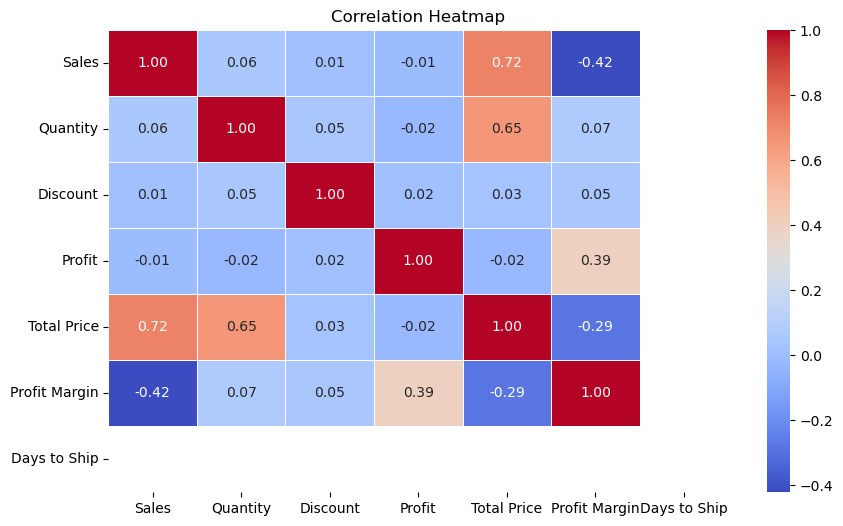

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 4, Perform Five Sort and Filter Operation 

In [99]:
sal_sorted_sales = sal.sort_values(by="Sales", ascending=False)
sal_sorted_sales.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
264,ORD-1264,PROD-2014,Office Supplies,Storage,997.31,6,0.1,167.18,South,New York,CUST-3024,2023-09-22,2023-09-24,First Class,Consumer,5983.86,0.167631,2
13,ORD-1013,PROD-2013,Technology,Tables,996.01,1,0.1,230.51,West,San Francisco,CUST-3013,2023-01-14,2023-01-16,First Class,Home Office,996.01,0.231433,2
71,ORD-1071,PROD-2021,Office Supplies,Phones,995.91,6,0.0,459.22,Central,San Francisco,CUST-3071,2023-03-13,2023-03-15,Same Day,Consumer,5975.46,0.461106,2
209,ORD-1209,PROD-2009,Furniture,Phones,986.53,1,0.0,-4.27,West,New York,CUST-3049,2023-07-29,2023-07-31,First Class,Home Office,986.53,-0.004328,2
107,ORD-1107,PROD-2007,Technology,Phones,985.58,9,0.0,63.96,Central,Chicago,CUST-3027,2023-04-18,2023-04-20,Same Day,Home Office,8870.22,0.064896,2


In [101]:
sal_west = sal[sal["Region"] == "West"]
sal_west.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
3,ORD-1003,PROD-2003,Technology,Tables,101.62,3,0.2,248.05,West,Houston,CUST-3003,2023-01-04,2023-01-06,First Class,Consumer,304.86,2.440957,2
5,ORD-1005,PROD-2005,Furniture,Tables,610.39,5,0.2,426.48,West,Chicago,CUST-3005,2023-01-06,2023-01-08,Standard Class,Home Office,3051.95,0.698701,2
8,ORD-1008,PROD-2008,Technology,Storage,947.27,8,0.0,433.25,West,San Francisco,CUST-3008,2023-01-09,2023-01-11,Standard Class,Consumer,7578.16,0.457367,2
9,ORD-1009,PROD-2009,Technology,Tables,785.67,9,0.2,473.39,West,Houston,CUST-3009,2023-01-10,2023-01-12,Same Day,Corporate,7071.03,0.602530,2
13,ORD-1013,PROD-2013,Technology,Tables,996.01,1,0.1,230.51,West,San Francisco,CUST-3013,2023-01-14,2023-01-16,First Class,Home Office,996.01,0.231433,2


In [109]:
sal_high_profit = sal[sal["Profit"] > 400]
sal_high_profit.head(5)

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
5,ORD-1005,PROD-2005,Furniture,Tables,610.39,5,0.2,426.48,West,Chicago,CUST-3005,2023-01-06,2023-01-08,Standard Class,Home Office,3051.95,0.698701,2
8,ORD-1008,PROD-2008,Technology,Storage,947.27,8,0.0,433.25,West,San Francisco,CUST-3008,2023-01-09,2023-01-11,Standard Class,Consumer,7578.16,0.457367,2
9,ORD-1009,PROD-2009,Technology,Tables,785.67,9,0.2,473.39,West,Houston,CUST-3009,2023-01-10,2023-01-12,Same Day,Corporate,7071.03,0.602530,2
10,ORD-1010,PROD-2010,Technology,Binders,131.20,2,0.2,417.28,Central,Chicago,CUST-3010,2023-01-11,2023-01-13,Standard Class,Home Office,262.40,3.180488,2
24,ORD-1024,PROD-2024,Furniture,Accessories,238.12,4,0.3,410.72,West,Chicago,CUST-3024,2023-01-25,2023-01-27,Standard Class,Home Office,952.48,1.724845,2


In [111]:
sal_high_discount = sal[sal["Discount"] > 0.2]
sal_high_discount.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
4,ORD-1004,PROD-2004,Furniture,Chairs,109.87,1,0.3,-45.11,Central,Chicago,CUST-3004,2023-01-05,2023-01-07,Standard Class,Corporate,109.87,-0.410576,2
6,ORD-1006,PROD-2006,Technology,Chairs,562.63,2,0.3,59.36,South,San Francisco,CUST-3006,2023-01-07,2023-01-09,First Class,Consumer,1125.26,0.105505,2
7,ORD-1007,PROD-2007,Office Supplies,Accessories,228.47,5,0.3,-22.29,East,New York,CUST-3007,2023-01-08,2023-01-10,First Class,Home Office,1142.35,-0.097562,2
11,ORD-1011,PROD-2011,Technology,Chairs,932.31,3,0.3,385.71,Central,San Francisco,CUST-3011,2023-01-12,2023-01-14,Same Day,Consumer,2796.93,0.413714,2
17,ORD-1017,PROD-2017,Office Supplies,Accessories,711.71,9,0.3,55.85,West,Chicago,CUST-3017,2023-01-18,2023-01-20,Second Class,Corporate,6405.39,0.078473,2


In [113]:
sal_technology = sal[sal["Category"] == "Technology"]
sal_technology.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
0,ORD-1000,PROD-2000,Technology,Binders,683.23,8,0.1,34.29,East,Seattle,CUST-3000,2023-01-01,2023-01-03,Same Day,Consumer,5465.84,0.050188,2
2,ORD-1002,PROD-2002,Technology,Chairs,503.17,7,0.0,255.76,East,San Francisco,CUST-3002,2023-01-03,2023-01-05,Same Day,Home Office,3522.19,0.508297,2
3,ORD-1003,PROD-2003,Technology,Tables,101.62,3,0.2,248.05,West,Houston,CUST-3003,2023-01-04,2023-01-06,First Class,Consumer,304.86,2.440957,2
6,ORD-1006,PROD-2006,Technology,Chairs,562.63,2,0.3,59.36,South,San Francisco,CUST-3006,2023-01-07,2023-01-09,First Class,Consumer,1125.26,0.105505,2
8,ORD-1008,PROD-2008,Technology,Storage,947.27,8,0.0,433.25,West,San Francisco,CUST-3008,2023-01-09,2023-01-11,Standard Class,Consumer,7578.16,0.457367,2


## 5 index method to perform 7 diffferent filter operation

In [118]:
sal_east = sal.loc[sal["Region"] == "East"]
sal_east.head()

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
0,ORD-1000,PROD-2000,Technology,Binders,683.23,8,0.1,34.29,East,Seattle,CUST-3000,2023-01-01,2023-01-03,Same Day,Consumer,5465.84,0.050188,2
1,ORD-1001,PROD-2001,Furniture,Storage,492.87,6,0.0,222.18,East,Chicago,CUST-3001,2023-01-02,2023-01-04,First Class,Home Office,2957.22,0.450788,2
2,ORD-1002,PROD-2002,Technology,Chairs,503.17,7,0.0,255.76,East,San Francisco,CUST-3002,2023-01-03,2023-01-05,Same Day,Home Office,3522.19,0.508297,2
7,ORD-1007,PROD-2007,Office Supplies,Accessories,228.47,5,0.3,-22.29,East,New York,CUST-3007,2023-01-08,2023-01-10,First Class,Home Office,1142.35,-0.097562,2
12,ORD-1012,PROD-2012,Furniture,Chairs,974.76,3,0.2,293.15,East,New York,CUST-3012,2023-01-13,2023-01-15,First Class,Home Office,2924.28,0.300741,2


In [120]:
sal_first_10 = sal.iloc[:10]
sal_first_10

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
0,ORD-1000,PROD-2000,Technology,Binders,683.23,8,0.1,34.29,East,Seattle,CUST-3000,2023-01-01,2023-01-03,Same Day,Consumer,5465.84,0.050188,2
1,ORD-1001,PROD-2001,Furniture,Storage,492.87,6,0.0,222.18,East,Chicago,CUST-3001,2023-01-02,2023-01-04,First Class,Home Office,2957.22,0.450788,2
2,ORD-1002,PROD-2002,Technology,Chairs,503.17,7,0.0,255.76,East,San Francisco,CUST-3002,2023-01-03,2023-01-05,Same Day,Home Office,3522.19,0.508297,2
3,ORD-1003,PROD-2003,Technology,Tables,101.62,3,0.2,248.05,West,Houston,CUST-3003,2023-01-04,2023-01-06,First Class,Consumer,304.86,2.440957,2
4,ORD-1004,PROD-2004,Furniture,Chairs,109.87,1,0.3,-45.11,Central,Chicago,CUST-3004,2023-01-05,2023-01-07,Standard Class,Corporate,109.87,-0.410576,2
5,ORD-1005,PROD-2005,Furniture,Tables,610.39,5,0.2,426.48,West,Chicago,CUST-3005,2023-01-06,2023-01-08,Standard Class,Home Office,3051.95,0.698701,2
6,ORD-1006,PROD-2006,Technology,Chairs,562.63,2,0.3,59.36,South,San Francisco,CUST-3006,2023-01-07,2023-01-09,First Class,Consumer,1125.26,0.105505,2
7,ORD-1007,PROD-2007,Office Supplies,Accessories,228.47,5,0.3,-22.29,East,New York,CUST-3007,2023-01-08,2023-01-10,First Class,Home Office,1142.35,-0.097562,2
8,ORD-1008,PROD-2008,Technology,Storage,947.27,8,0.0,433.25,West,San Francisco,CUST-3008,2023-01-09,2023-01-11,Standard Class,Consumer,7578.16,0.457367,2
9,ORD-1009,PROD-2009,Technology,Tables,785.67,9,0.2,473.39,West,Houston,CUST-3009,2023-01-10,2023-01-12,Same Day,Corporate,7071.03,0.602530,2


In [122]:
sal.loc[:4, ["Sales", "Profit"]]

,Sales,Profit
0,683.23,34.29
1,492.87,222.18
2,503.17,255.76
3,101.62,248.05
4,109.87,-45.11


In [124]:
sal.iloc[20:31, 2:6]

,Category,Sub-Category,Sales,Quantity
20,Furniture,Accessories,840.22,5
21,Furniture,Accessories,869.53,5
22,Office Supplies,Storage,841.71,5
23,Office Supplies,Binders,437.57,3
24,Furniture,Accessories,238.12,4
25,Furniture,Binders,408.72,9
26,Furniture,Binders,894.06,9
27,Technology,Phones,163.67,2
28,Technology,Storage,523.06,8
29,Technology,Accessories,248.56,8


In [126]:
sal.loc[(sal["Sales"] > 800) & (sal["Region"] == "South")]

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
21,ORD-1021,PROD-2021,Furniture,Accessories,869.53,5,0.3,32.11,South,New York,CUST-3021,2023-01-22,2023-01-24,Standard Class,Corporate,4347.65,0.036928,2
26,ORD-1026,PROD-2026,Furniture,Binders,894.06,9,0.3,188.35,South,San Francisco,CUST-3026,2023-01-27,2023-01-29,Standard Class,Home Office,8046.54,0.210668,2
49,ORD-1049,PROD-2049,Office Supplies,Tables,826.33,6,0.3,-22.68,South,Seattle,CUST-3049,2023-02-19,2023-02-21,First Class,Home Office,4957.98,-0.027447,2
138,ORD-1138,PROD-2038,Technology,Phones,834.74,1,0.2,377.92,South,San Francisco,CUST-3058,2023-05-19,2023-05-21,Same Day,Corporate,834.74,0.452740,2
152,ORD-1152,PROD-2002,Technology,Storage,980.85,5,0.3,-93.03,South,Chicago,CUST-3072,2023-06-02,2023-06-04,Same Day,Home Office,4904.25,-0.094846,2
160,ORD-1160,PROD-2010,Technology,Chairs,912.26,6,0.0,367.91,South,Chicago,CUST-3000,2023-06-10,2023-06-12,Same Day,Corporate,5473.56,0.403295,2
251,ORD-1251,PROD-2001,Technology,Phones,935.02,8,0.2,278.94,South,New York,CUST-3011,2023-09-09,2023-09-11,First Class,Corporate,7480.16,0.298325,2
258,ORD-1258,PROD-2008,Technology,Chairs,809.75,8,0.2,482.84,South,Chicago,CUST-3018,2023-09-16,2023-09-18,Second Class,Home Office,6478.00,0.596283,2
264,ORD-1264,PROD-2014,Office Supplies,Storage,997.31,6,0.1,167.18,South,New York,CUST-3024,2023-09-22,2023-09-24,First Class,Consumer,5983.86,0.167631,2
265,ORD-1265,PROD-2015,Office Supplies,Chairs,898.68,4,0.2,208.89,South,Seattle,CUST-3025,2023-09-23,2023-09-25,Standard Class,Corporate,3594.72,0.232441,2


In [128]:
sal.iloc[-5:]

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
295,ORD-1295,PROD-2045,Office Supplies,Binders,690.88,1,0.2,383.40,South,Houston,CUST-3055,2023-10-23,2023-10-25,First Class,Consumer,690.88,0.554944,2
296,ORD-1296,PROD-2046,Office Supplies,Tables,106.11,3,0.3,251.21,South,Seattle,CUST-3056,2023-10-24,2023-10-26,Same Day,Corporate,318.33,2.367449,2
297,ORD-1297,PROD-2047,Office Supplies,Chairs,156.05,5,0.2,420.96,West,Chicago,CUST-3057,2023-10-25,2023-10-27,Second Class,Corporate,780.25,2.697597,2
298,ORD-1298,PROD-2048,Office Supplies,Tables,22.66,4,0.1,23.50,East,New York,CUST-3058,2023-10-26,2023-10-28,Second Class,Home Office,90.64,1.037070,2
299,ORD-1299,PROD-2049,Office Supplies,Accessories,134.36,3,0.0,-32.85,Central,Seattle,CUST-3059,2023-10-27,2023-10-29,Second Class,Corporate,403.08,-0.244492,2


In [130]:
sal.loc[(sal["Quantity"] > 5) & (sal["Profit"] < 0)]

,Order ID,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City,Customer ID,Order Date,Ship Date,Ship Mode,Segment,Total Price,Profit Margin,Days to Ship
14,ORD-1014,PROD-2014,Office Supplies,Binders,74.75,8,0.1,-47.81,West,Seattle,CUST-3014,2023-01-15,2023-01-17,Same Day,Home Office,598.00,-0.639599,2
44,ORD-1044,PROD-2044,Furniture,Storage,268.61,8,0.0,-4.84,South,Chicago,CUST-3044,2023-02-14,2023-02-16,First Class,Consumer,2148.88,-0.018019,2
49,ORD-1049,PROD-2049,Office Supplies,Tables,826.33,6,0.3,-22.68,South,Seattle,CUST-3049,2023-02-19,2023-02-21,First Class,Home Office,4957.98,-0.027447,2
75,ORD-1075,PROD-2025,Office Supplies,Phones,916.95,8,0.0,-59.30,East,San Francisco,CUST-3075,2023-03-17,2023-03-19,Second Class,Corporate,7335.60,-0.064671,2
87,ORD-1087,PROD-2037,Furniture,Phones,274.75,6,0.0,-21.95,West,San Francisco,CUST-3007,2023-03-29,2023-03-31,Standard Class,Home Office,1648.50,-0.079891,2
89,ORD-1089,PROD-2039,Furniture,Storage,51.67,8,0.3,-85.25,South,Chicago,CUST-3009,2023-03-31,2023-04-02,Same Day,Corporate,413.36,-1.649894,2
90,ORD-1090,PROD-2040,Furniture,Tables,294.17,7,0.1,-86.73,West,New York,CUST-3010,2023-04-01,2023-04-03,Second Class,Corporate,2059.19,-0.294830,2
104,ORD-1104,PROD-2004,Technology,Accessories,423.03,6,0.1,-50.57,East,San Francisco,CUST-3024,2023-04-15,2023-04-17,Same Day,Corporate,2538.18,-0.119542,2
109,ORD-1109,PROD-2009,Office Supplies,Storage,754.59,7,0.1,-9.37,West,San Francisco,CUST-3029,2023-04-20,2023-04-22,Second Class,Home Office,5282.13,-0.012417,2
121,ORD-1121,PROD-2021,Technology,Storage,914.90,8,0.3,-81.32,East,New York,CUST-3041,2023-05-02,2023-05-04,First Class,Corporate,7319.20,-0.088884,2


## 6, six visuals 

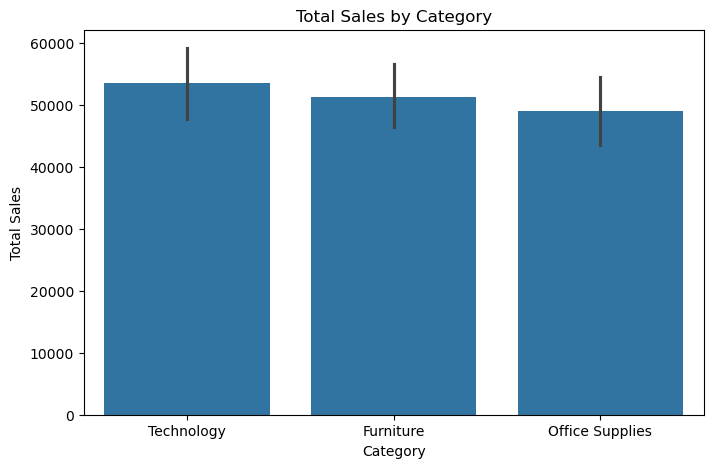

In [133]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sal, x="Category", y="Sales", estimator=sum)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.show()

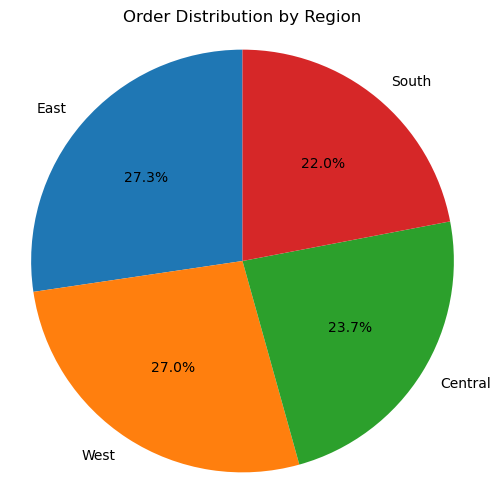

In [135]:
region_counts = sal["Region"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Order Distribution by Region")
plt.axis("equal")
plt.show()

C:\Users\Hp user\AppData\Local\Temp\ipykernel_8820\971038078.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sal.resample("M", on="Order Date")["Sales"].sum()


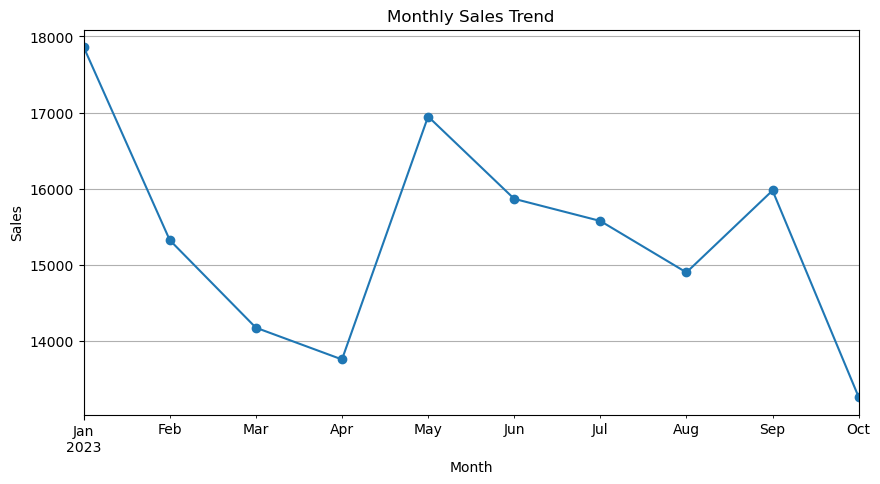

In [137]:
monthly_sales = sal.resample("M", on="Order Date")["Sales"].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

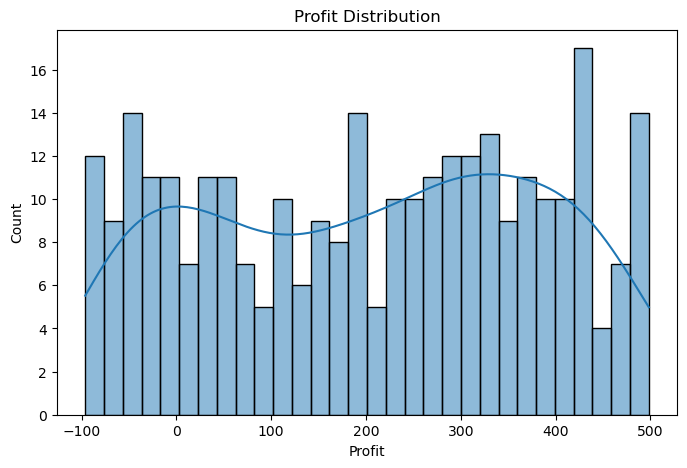

In [139]:
plt.figure(figsize=(8, 5))
sns.histplot(sal["Profit"], bins=30, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.show()

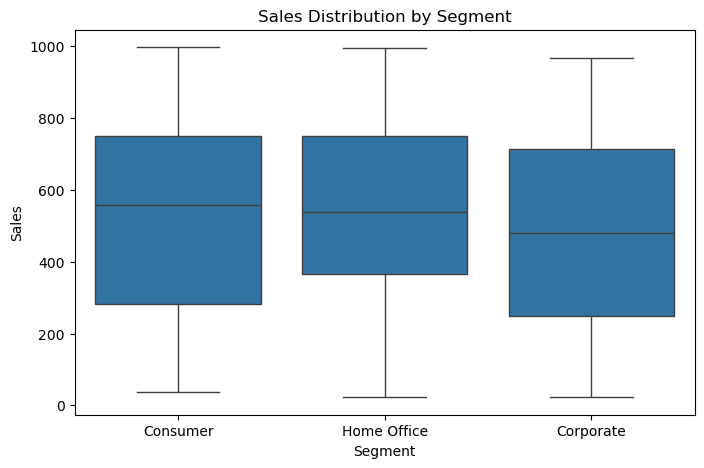

In [141]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sal, x="Segment", y="Sales")
plt.title("Sales Distribution by Segment")
plt.ylabel("Sales")
plt.show()

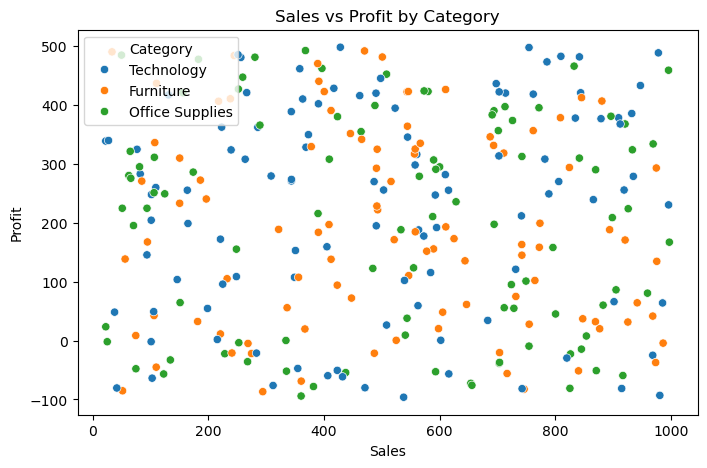

In [143]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sal, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit by Category")
plt.show()

## 7, discriptive statistics 

In [146]:
sal.describe()

,Sales,Quantity,Discount,Profit,Order Date,Ship Date,Total Price,Profit Margin,Days to Ship
count,300.000000,300.000000,300.000000,300.000000,300,300,300.000000,300.000000,300.0
mean,512.232433,4.963333,0.140000,204.802367,2023-05-30 12:00:00,2023-06-01 12:00:00,2585.884867,0.790637,2.0
min,22.540000,1.000000,0.000000,-96.170000,2023-01-01 00:00:00,2023-01-03 00:00:00,51.170000,-1.928126,2.0
25%,268.440000,3.000000,0.000000,44.555000,2023-03-16 18:00:00,2023-03-18 18:00:00,769.380000,0.072443,2.0
50%,523.995000,5.000000,0.100000,219.010000,2023-05-30 12:00:00,2023-06-01 12:00:00,2023.835000,0.419241,2.0
75%,742.435000,7.000000,0.200000,355.372500,2023-08-13 06:00:00,2023-08-15 06:00:00,3959.630000,0.801838,2.0
max,997.310000,9.000000,0.300000,498.270000,2023-10-27 00:00:00,2023-10-29 00:00:00,8870.220000,15.037711,2.0
std,279.434431,2.564614,0.109728,175.671351,NaN,NaN,2137.114979,1.703630,0.0


In [152]:
sal[["Sales","Profit","Quantity", "Discount"]].describe()

,Sales,Profit,Quantity,Discount
count,300.000000,300.000000,300.000000,300.000000
mean,512.232433,204.802367,4.963333,0.140000
std,279.434431,175.671351,2.564614,0.109728
min,22.540000,-96.170000,1.000000,0.000000
25%,268.440000,44.555000,3.000000,0.000000
50%,523.995000,219.010000,5.000000,0.100000
75%,742.435000,355.372500,7.000000,0.200000
max,997.310000,498.270000,9.000000,0.300000


## Machine learning 